# <center> Линейная алгебра в контексте линейных методов. Практика.

## <center> Прогнозирование выработки газа на скважинах.

## Постановка задачи

У Василия, основателя компании «Газ-Таз-Ваз-Нефть», дела идут в гору: у него уже функционирует 200 скважин для добычи газа. В этом году он открывает 30 новых скважин. Однако в целях оптимизации расходов и повышения дохода Василию необходимо оценить, сколько денег будет приносить ему каждая из скважин, а также понять, какие факторы (параметры скважин) потенциально сильнее всего повлияют на объём добычи газа. Для этого Василий решил нанять вас как специалиста в области Data Science.

Василий представляет вам набор данных о добыче газа на своих скважинах. Файл с данными вы можете скачать на платформе.

**Признаки в данных:**

* Well — идентификатор скважины;
* Por — пористость скважины (%);
* Perm — проницаемость скважины;
* AI — акустический импеданс ($кг/м^2 * 10^6$);
* Brittle — коэффициент хрупкости скважины (%);
* TOC — общий органический углерод (%);
* VR — коэффициент отражения витринита (%);
* Prod — добыча газа в сутки (млн. кубических футов).

**Ваша задача** — построить регрессионную модель, которая прогнозирует выработку газа на скважине (целевой признак — Prod) на основе остальных характеристик скважины, и проинтерпретировать результаты вашей модели.

Разделим задачу на две части:
* В первой мы построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.
* Во второй мы займёмся построением модели полиномиальной регрессии с регуляризацией и посмотрим на итоговые результаты моделирования.


Импортируем необходимые библиотеки:

In [1]:
# Импорт библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков
%matplotlib inline

Прочитаем исходные данные:

In [2]:
# Загрузка данных
data = pd.read_csv('Data/unconv.csv')

# Прочитаем первые и последние 5 строк
display(data.head(5))
display(data.tail(5))

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
195,196,11.95,3.13,2.97,67.18,0.80,2.06,3847.571003
196,197,17.99,9.87,3.38,44.32,0.98,2.08,5601.227131
197,198,12.12,2.27,3.52,57.07,-0.04,1.73,3409.575363
198,199,15.55,4.48,2.48,58.25,1.89,2.35,5087.592149
199,200,20.89,7.54,3.23,46.17,1.71,2.27,6662.622385


## Практика: линейная регрессия по методу наименьших квадратов

Для начала построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.

В первой части вам предстоит выполнить задания 5.0–5.6. Максимальное количество баллов, которое можно получить, — 9.

### Задание 5.0. (не оценивается)

Проведите небольшой разведывательный анализ, чтобы поближе познакомиться с исходными данными. Постройте несколько визуализаций, которые помогут вам понять, как устроены исходные признаки, а также смогут продемонстрировать взаимосвязь факторов.

Сделайте промежуточные выводы из проведённого разведывательного анализа.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Well     200 non-null    int64  
 1   Por      200 non-null    float64
 2   Perm     200 non-null    float64
 3   AI       200 non-null    float64
 4   Brittle  200 non-null    float64
 5   TOC      200 non-null    float64
 6   VR       200 non-null    float64
 7   Prod     200 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 12.6 KB


None

Пропуски: 
Well       0
Por        0
Perm       0
AI         0
Brittle    0
TOC        0
VR         0
Prod       0
dtype: int64


'Дубликаты: 0'

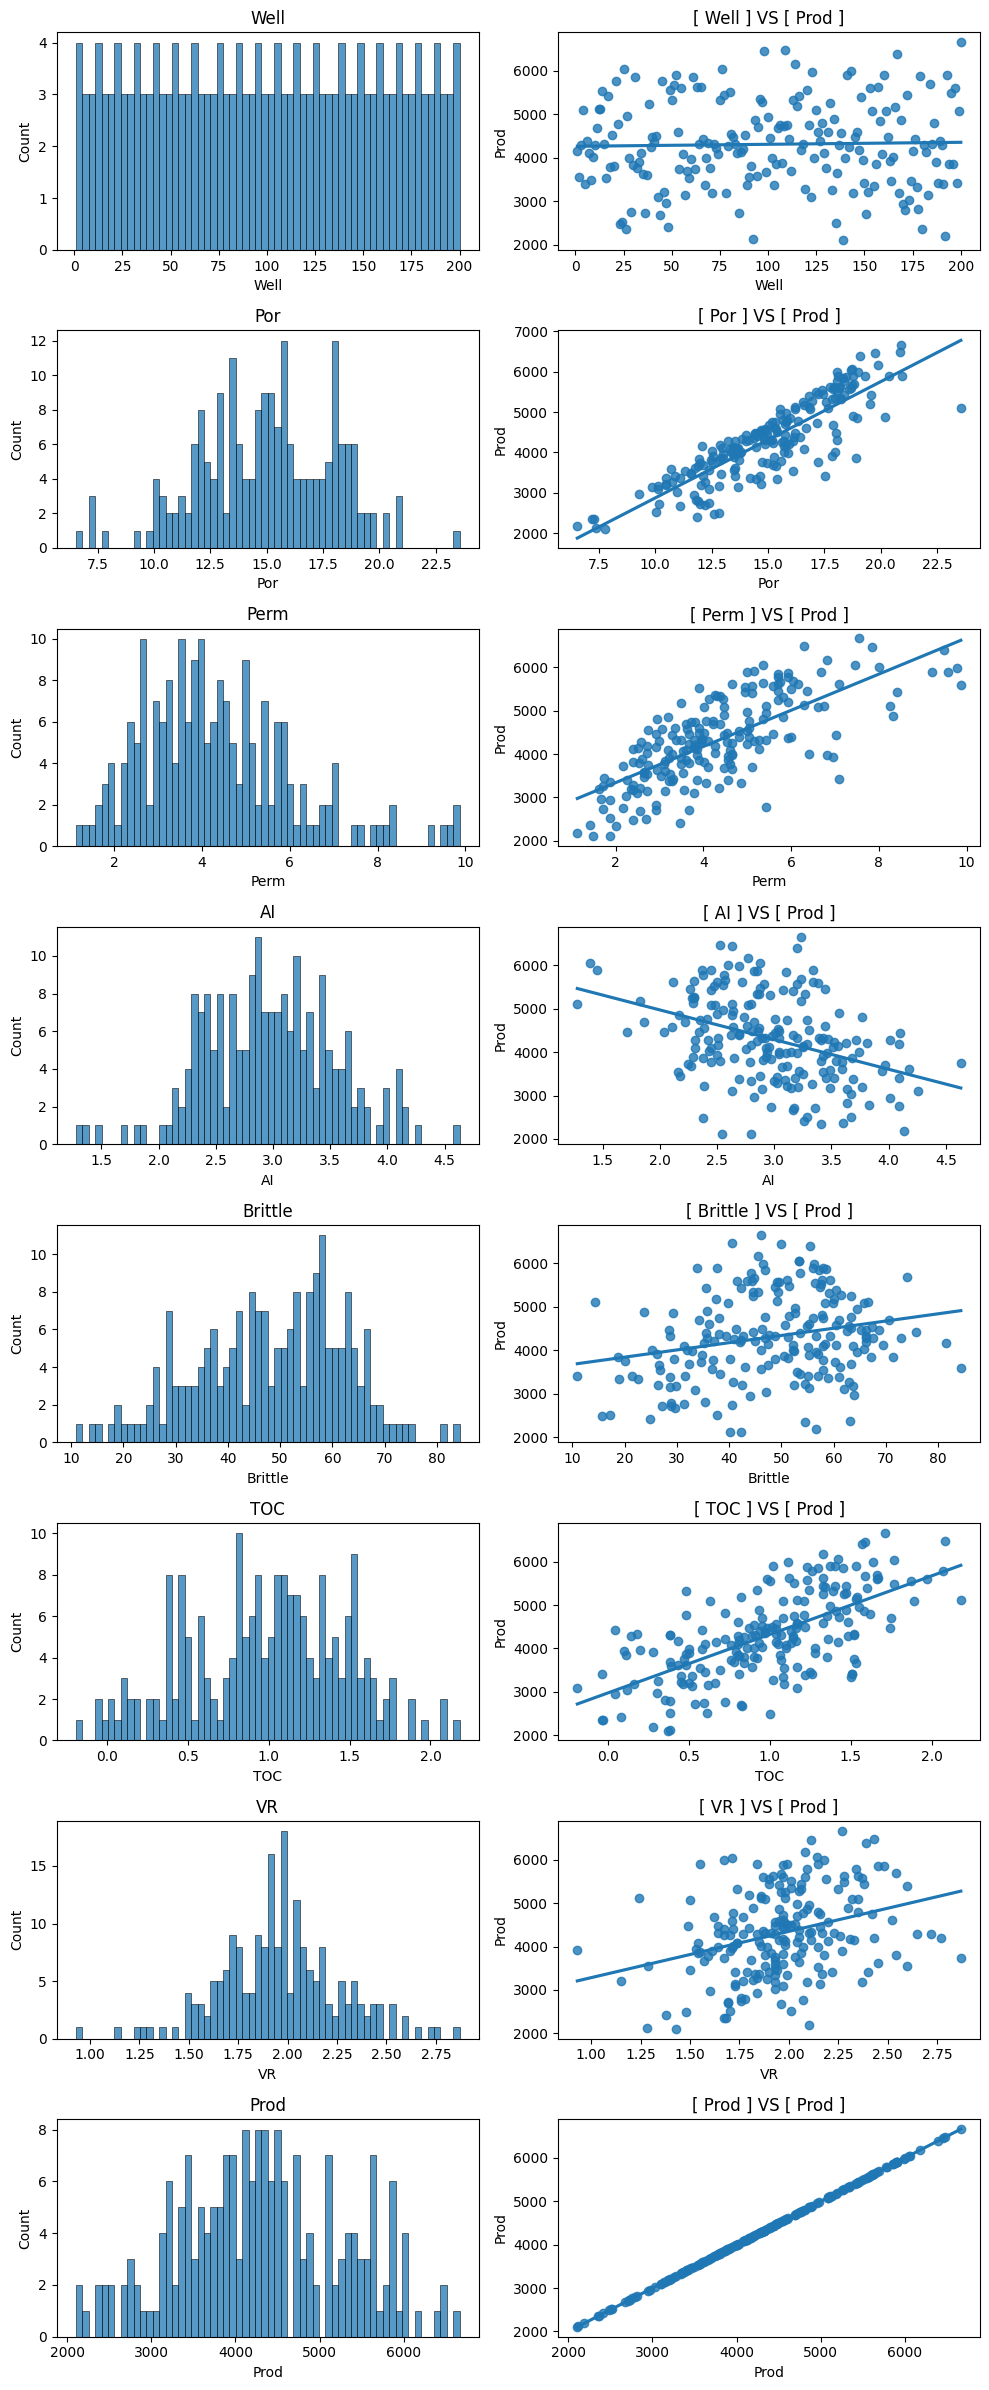

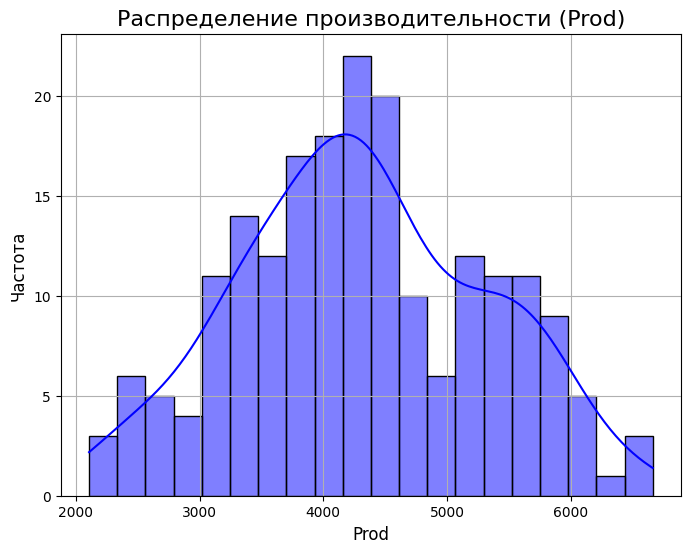

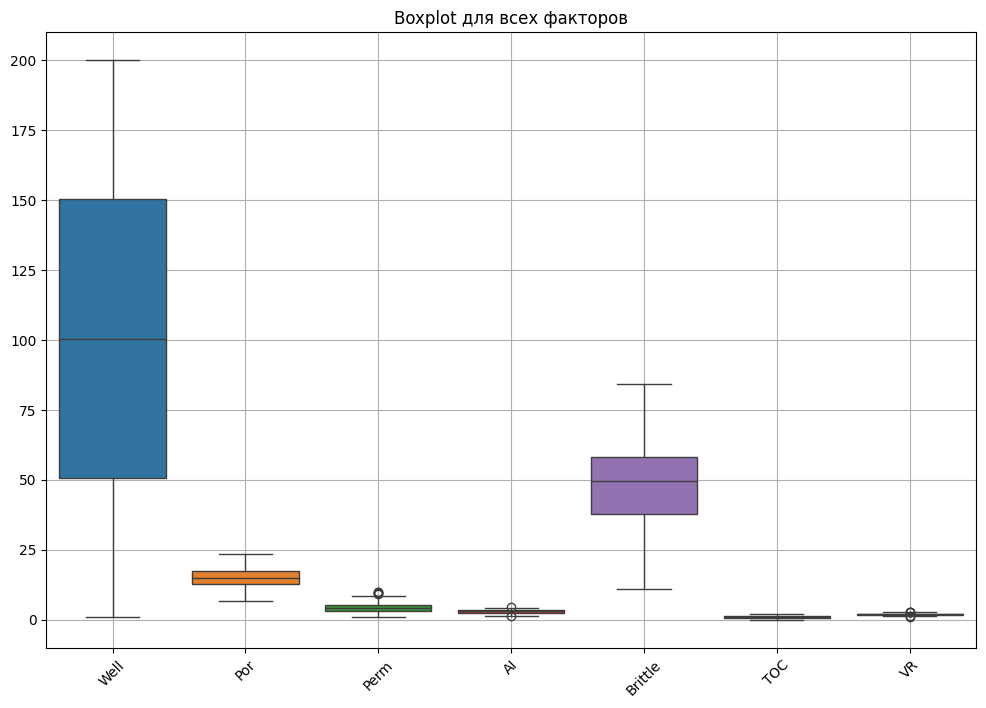

In [3]:
# Основная информация о датасете
display(data.info())

# Проверим на пропуски в датасете
print(f'Пропуски: \n{data.isnull().sum()}')

# Дубликаты
display(f'Дубликаты: {data.duplicated().sum()}')

# Распределение данных
features = list(data.select_dtypes(include=['int64', 'float64']).columns)  

# Количество числовых признаков
num_of_rows = len(features)

# Создаем фигуру и набор осей
fig, axes = plt.subplots(num_of_rows, 2, figsize=(10, num_of_rows * 3))  # Динамическое изменение высоты

# Основные числовые признаки
for i, feature in enumerate(features):
    # Строим гистограмму распределения признака
    sns.histplot(data=data, x=feature, bins=60, ax=axes[i][0]).set_title(f'{feature}')
    
    # Строим диаграмму рассеяния и линию регрессии
    sns.regplot(data=data, x=feature, y='Prod', ci=None, ax=axes[i][1]).set_title(f'[ {feature} ] VS [ Prod ]')

# Плотная компоновка и отображение графиков
plt.tight_layout()
plt.show()

# Распределение целевой переменной (Prod)
plt.figure(figsize=(8, 6))
sns.histplot(data['Prod'], kde=True, color='blue', bins=20)
plt.title('Распределение производительности (Prod)', fontsize=16)
plt.xlabel('Prod', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.grid()
plt.show()

# Проверка на выбросы
plt.figure(figsize=(12, 8))
sns.boxplot(data=data.drop('Prod', axis=1))
plt.title("Boxplot для всех факторов")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Вывод: 
В датасете у нас 200 записей и 8 признаков, все из них являются численными типами данных, категориальных нет. Кроме того, пропусков в данных нет, значит дополнительной обработки данных пока не требуется. Дубликатов нет. 

Касательно целевого признака:
- Производительность скважин варьируется от 2000 до 6000 ед.;
- Распределение близко к нормальному, с небольшим перекосом вправо;
- Признак Perm (проницаемость скважины) скорее всего содержит выбросы.

### Задание 5.1. (2 балла)

Постройте корреляционную матрицу факторов, включив в неё целевой признак. 

Для наглядности визуализируйте полученную матрицу с помощью тепловой карты. 

**Примечание.** *Для визуализации вы можете использовать любую из знакомых вам библиотек.*

На основе построенной корреляционной матрицы ответьте на следующий вопрос:

* Какие факторы сильнее всего коррелируют с целевой переменной?

Вычислите ранг и определитель полученной матрицы корреляций и приведите развёрнутые ответы на следующие вопросы:
* Является ли корреляционная матрица плохо обусловенной (близок ли её опредитель к нулю)?
* Что вы можете сказать о наличии коллинераности/мультиколлинеарности в данных? 
* Применима ли в данном случае модель классической линейной регрессии по методу наименьших квадратов и почему?

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для расчёта корреляционной матрицы;
    * приведён код для визуализации корреляционной матрицы в виде тепловой карты;
    * рассчитаны ранг и определитель корреляционной матрицы;
    * предоставлены обоснованные ответы на все поставленные вопросы. 

- Задание выполнено верно, но не учтено одно условие (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

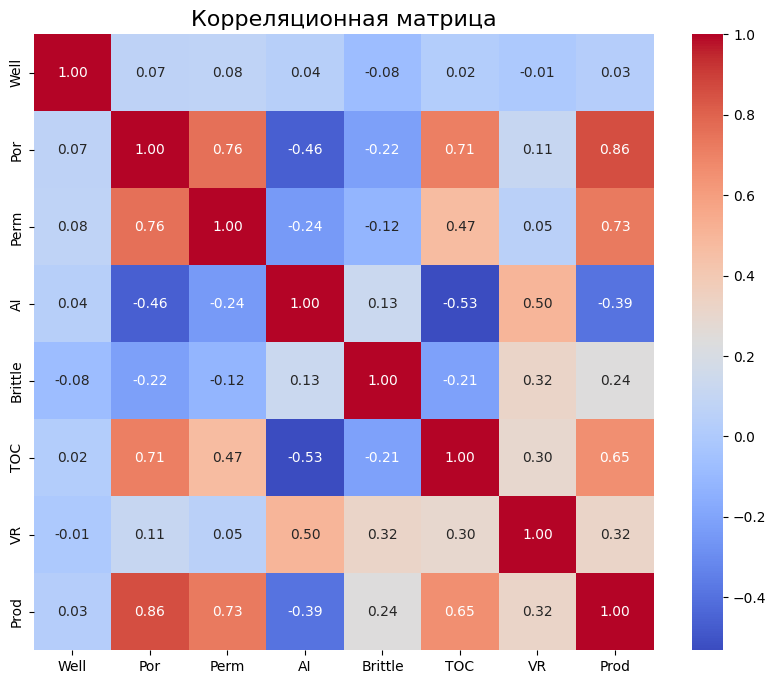

'Ранг матрицы корреляций: 8'

'Определитель матрицы корреляций: 0.0007299'

In [4]:
# Корреляционная матрица с использованием тепловой карты
plt.figure(figsize=(10, 8))
corr_matrix = data.corr()  # Вычисляем корреляционную матрицу
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Корреляционная матрица', fontsize=16)
plt.show()

# Ранг и определитель матрицы корреляции
display(f'Ранг матрицы корреляций: {np.linalg.matrix_rank(corr_matrix)}')
display(f'Определитель матрицы корреляций: {np.linalg.det(corr_matrix).round(7)}')

### Вывод:
Сильнее всего с целевой переменной коррелируют следующие факторы:

- Por (пористость скважины) довольно сильно коррелирует с целевым признаком Prod - 0.86, что говорит о линейной зависимости между пористостью и производительностью. С увеличением пористости скважины растет и производительность (легче добыча газа).
- Perm (проницаемость скважины) имеет значительную положительную корреляцию - 0.73, что может означать влияние производительности от проницаемости скважины, что логично. Чем выше проницаемость скважины тем выше производительность газа.
- Ai (аккустический импенданс) отмечается отрицательная корреляция - (- 0.39) между оценкой свойств пластов (определяющийся с помощью аккустического импенданса) и производительностью. Чем ниже характеристика этого параметра, тем ниже производительность, хотя и не является сильно коррелированной.

Ранг матрицы корреляций совпадает с количеством столбцов матрицы, однако определитель близок к нулю (плохообусловленная матрица), что может свидетельствовать о наличии сильной мультиколлинеарности между признаками:
1. TOC (общий органический углерод) и Por (пористостью) - 0.71;
2. Perm (проницаемость скважины) и Por (пористостью) - 0.76;
3. Ai (аккустический импенданс) и TOC (общий органический углерод) - -0.53.

Признаки Por, Perm, и Ai могут быть линейно зависимыми друг от друга.

Учитывая вышеописанные факторы, в данном случае, без дополнительной обработки данных классическая модель не сможет дать внятный результат.

### Задание 5.2. (2 балла)

Создайте матрицу наблюдений `X` и вектор правильных ответов `y`. В качестве факторов для матрицы наблюдений возьмите все имеющиеся в данных признаки. 

Постройте модель линейной регрессии по методу наименьших квадратов. Для этого воспользуйтесь матричной формулой МНК и инструментарием библиотеки numpy. 

Выведите на экран полученные оценки коэффициентов модели, округлённые до целого.

Приведите подробные выводы по полученным результатам, ответив на следующие вопросы:
* Есть ли в ваших данных признаки, которые, согласно модели, можно назвать неинформативными, то есть они не оказывают влияния на целевую переменную или оказывают шумовое влияние?
* Приведите интерпретацию нескольких (двух или трёх) коэффициентов полученной модели линейной регрессии.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для нахождения параметров модели линейной регрессии с помощью матричной формулы МНК;
    * на основе полученных параметров даны верные ответы на поставленные вопросы;
    * приведена корректная интерпретация нескольких коэффициентов полученной модели линейной регрессии.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [5]:
# Матрица наблюдений и вектор правильных ответов
X = np.column_stack((np.ones(data.shape[0]), data.drop(['Prod'], axis=1)))
y = data[['Prod']]

# вычисляем OLS-оценку для коэффициентов
w_hat = np.linalg.inv(X.T @ X) @ X.T @ y
print(w_hat.round())

print(data.info())

     Prod
0 -1232.0
1     0.0
2   230.0
3   116.0
4  -365.0
5    25.0
6   -78.0
7   785.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Well     200 non-null    int64  
 1   Por      200 non-null    float64
 2   Perm     200 non-null    float64
 3   AI       200 non-null    float64
 4   Brittle  200 non-null    float64
 5   TOC      200 non-null    float64
 6   VR       200 non-null    float64
 7   Prod     200 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 12.6 KB
None


### Вывод:
Классическая модель линейной регрессии с использованием МНК дала следующие результаты:

* Бросается в глаза признак Por с коэффициентом 0.0, что говорит об отсутствии влияния данного признака на целевую переменную, хотя ее корреляция с целевым признаком высока, что (по идеи) должно отражаться в коэффициентах, однако данная модель это не отображает.

* Признаки: Perm (230.0), Ai (116.0). Эти признаки имеют значимые коэффициенты.
Brittle (-365.0), VR (-78.0) и TOC (25.0) имеют ненулевые коэффициенты, их влияние может быть слабым или менее значимым в сравнении с другими.

* Значительное положительное влияние Perm говорит о том, что эта переменная является важным фактором, связана с увеличением целевой переменной.

* Отрицательный знак в признаке Brittle указывает на обратную связь. Например, возможно, увеличение показателя Brittle связано с характеристиками, которые негативно влияют на производительность (Prod).

### Задание 5.3. (1 балл)

Теперь потренируемся строить предсказание для наблюдений целевой переменной.

**а)** Постройте прогноз выработки газа для скважины со следующими параметрами:

```python
{
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
 }
```

Рассчитайте абсолютную ошибку построенного вами прогноза для предложенной скважины (в миллионах кубических футов в день), если известно, что на этой скважине производится `4748.315024` миллионов кубических футов газа в день.

**б)** Постройте прогноз выработки газа для всех скважин из обучающего набора данных. Выберите метрику, по которой вы будете оценивать качество регрессионных моделей и сравнивать их между собой (можно использовать несколько метрик, но не более двух).

Рассчитайте значение выбранной метрики для вашей модели. Приведите интерпретацию полученного результата. 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * приведён код для построения прогноза выработки газа на указанной скважине и рассчитана абсолютная ошибка прогноза для этой скважины;
    * выбрана корректная для поставленной задачи метрика (или метрики) оценки качества модели и приведён код для расчёта этой метрики на всём обучающем наборе данных;
    * приведена корректная интерпретация полученного результата.

- Задание выполнено верно, но не учтено одно из условий, или задание выполнено неверно (**0 баллов**).

In [6]:
# Данные для одной скважины
df = pd.DataFrame(
    {'Well': [106.0],
     'Por': [15.32],
     'Perm': [3.71],
     'AI': [3.29],
     'Brittle': [55.99],
     'TOC': [1.35],
     'VR': [2.42],
     'Prod': [4748.315024]  # Целевой признак
     }
)

# Матрица наблюдений и вектор правильных ответов
X = np.column_stack((np.ones(df.shape[0]), df.drop('Prod', axis=1)))  # Добавляем столбец единиц для интерсепта
y = df['Prod'].values

# Вычисляем коэффициенты линейной регрессии вручную (OLS-оценка)
w_hat = np.linalg.pinv(X.T @ X) @ X.T @ y

# Прогноз для одной скважины
y_pred = X @ w_hat
y_pred_scalar = y_pred.item()  # Преобразуем в скалярное значение

# Фактическое значение
y_actual = y[0]

# Абсолютная ошибка
absolute_error = np.abs(y_actual - y_pred_scalar)

# Результат
print("Коэффициенты модели:")
for i, coef in enumerate(['Intercept'] + list(df.drop('Prod', axis=1).columns)):
    print(f"{coef}: {w_hat[i]:.2f}")

print(f"\nФактическое значение: {y_actual:.2f} млн. кубических футов в день")
print(f"Абсолютная ошибка: {absolute_error:.2f} млн кубических футов в день")

Коэффициенты модели:
Intercept: 0.32
Well: 34.38
Por: 4.97
Perm: 1.20
AI: 1.07
Brittle: 18.16
TOC: 0.44
VR: 0.78

Фактическое значение: 4748.32 млн. кубических футов в день
Абсолютная ошибка: 0.00 млн кубических футов в день


In [7]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# Матрица наблюдений и вектор правильных ответов
X = np.column_stack((np.ones(data.shape[0]), data.drop('Prod', axis=1)))
y = data['Prod'].values

# Вычисляем коэффициенты модели линейной регрессии (OLS-оценка)
w_hat = np.linalg.inv(X.T @ X) @ X.T @ y

# Прогноз для всех скважин
y_pred = X @ w_hat

# Для оценки качества модели линейной регрессии использовал две метрики: MAE и MAPE
mae = mean_absolute_error(y, y_pred)  # Средняя абсолютная ошибка
mape = mean_absolute_percentage_error(y, y_pred) * 100  # Средняя абсолютная процентная ошибка

# Коэффициенты модели
coeff = pd.DataFrame({
    'Признак': ['Intercept'] + list(data.drop('Prod', axis=1).columns),
    'Коэффициент модели': w_hat
})

# Результаты
print("Коэффициенты модели:")
print(coeff.round())  # Округляем для удобства вывода
print(f"Средняя абсолютная ошибка (MAE): {mae:.2f} млн куб. футов")
print(f"Средняя абсолютная процентная ошибка (MAPE): {mape:.2f}%")


Коэффициенты модели:
     Признак  Коэффициент модели
0  Intercept             -1232.0
1       Well                 0.0
2        Por               230.0
3       Perm               116.0
4         AI              -365.0
5    Brittle                25.0
6        TOC               -78.0
7         VR               785.0
Средняя абсолютная ошибка (MAE): 153.62 млн куб. футов
Средняя абсолютная процентная ошибка (MAPE): 3.63%


# Вывод:
В первом случае, когда мы обучаем модель на одной наблюдении (используя классический подход), абсолютная ошибка составляет 0.00 млн кубических футов в день, это является результатом того, что модель обучается и тестируется на одном и том же наблюдении, что не дает информации о качестве модели, так как она фактически запоминает одни данные.
Примечание: Поскольку наша матрица не имела обратной из-за лишь одного наблюдения, использовал псевдоматрицу (вместо np.linalg.inv использовал np.linalg.pinv).

Во втором случае картина другая: Модель классической регрессии без использования регуляризации и стандартизации данных показывает:
- Среднюю абсолютную ошибку (MAE) в 153.62 миллиона кубических футов в день, что является умеренным отклонением, учитывая масштаб данных хоть и небольшой, но достаточный для обучения модели. Это значение могло бы быть ниже, если бы использовались методы регуляризации.
- Среднюю абсолютную процентную ошибку (MAPE) в 3.63%, что указывает на хорошую точность модели.
Однако, модель можно улучшить, применив методы регуляризации (L2-Ridge или L1-Lasso), стандартизацию данных и проверку через кросс-валидацию. Это могло бы снизить среднюю ошибку и повысить устойчивость модели.

### Задание 5.4. (1 балл)

Настало время анализа построенной модели. Посмотрите на коэффициенты и сравните их знаки со значениями выборочных корреляций между целевым признаком и факторами, которые вы нашли ранее.

Дайте развёрнутые ответы на следующие вопросы:

* Есть ли в вашей модели фактор, при котором коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции? Например, корреляция говорит, что зависимость между фактором и целевой переменной прямая, а модель говорит обратное. Если таких факторов несколько, укажите их все.
* Как вы считаете, с чем связано полученное противоречие результатов?

**Критерии оценивания:**

- Задание выполнено верно, даны корректные развёрнутые ответы на все поставленные в задании вопросы (**1 балл**). 

- Задание выполнено неверно, даны некорректные ответы на один или несколько поставленных в задании вопросов (**0 баллов**).

Коэффициенты модели и корреляции:
+-----------+---------------------+------------------------+--------------+
|  Признак  | Коэффициент модели  | Коэффициент корреляции | Противоречие |
+-----------+---------------------+------------------------+--------------+
| Intercept | -1232.3080295603972 |          nan           |    False     |
|   Well    | 0.05070036308759773 |  0.02681677681635362   |    False     |
|    Por    | 230.17914037550747  |   0.8619095390498694   |    False     |
|   Perm    | 116.23900607025996  |   0.7274261409379983   |    False     |
|    AI     | -365.2023007951148  |  -0.39083476681722223  |    False     |
|  Brittle  |  24.99436997222944  |  0.23715533470634578   |    False     |
|    TOC    | -78.40092940183911  |   0.6544451995719837   |     True     |
|    VR     |  785.2598145745252  |   0.3231815474813121   |    False     |
+-----------+---------------------+------------------------+--------------+


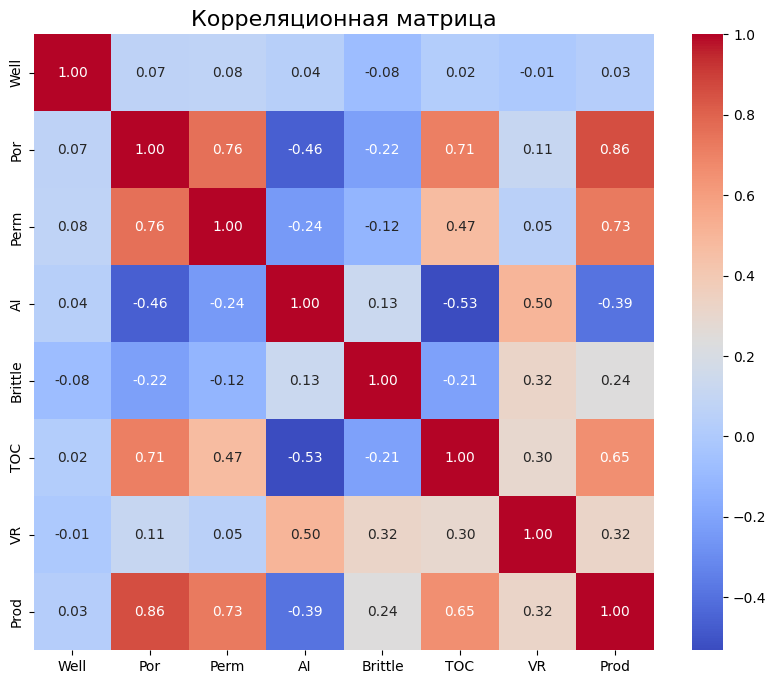

In [24]:
from tabulate import tabulate

# Матрица наблюдений и вектор правильных ответов
X = np.column_stack((np.ones(data.shape[0]), data.drop('Prod', axis=1)))
y = data['Prod'].values

# Вычисляем коэффициенты модели линейной регрессии (OLS-оценка)
w_hat = np.linalg.inv(X.T @ X) @ X.T @ y

# Коэффициенты модели
coeff = pd.DataFrame({
    'Признак': ['Intercept'] + list(data.drop('Prod', axis=1).columns),
    'Коэффициент модели': w_hat
})

# Рассчитываем выборочные корреляции
corr = data.corr()['Prod'].drop('Prod').reset_index()
corr.columns = ['Признак', 'Коэффициент корреляции']

# Сравниваем коэффициенты и корреляции
result = pd.merge(coeff, corr, on='Признак', how='left')
result['Противоречие'] = (result['Коэффициент модели'] * result['Коэффициент корреляции'] < 0)

# Вывод результатов
print("Коэффициенты модели и корреляции:")
print(tabulate(result, headers='keys', tablefmt='pretty', showindex=False))

# Построение корреляционной матрицы
plt.figure(figsize=(10, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Корреляционная матрица', fontsize=16)
plt.show()


# Вывод:
В данной модели обнаружился фактор, при котором коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции (коэффициент корреляции указывает на положительную зависимость между признаком TOC и целевой переменной, а модель говорит об отрицательной связи, к тому же более коррелированной), это признак - TOC.

Скорее всего такая несостыковка связана с мультиколлинеарностью между признаками, наличием выбросов в данных - признак Perm. Этот признак (согласно матрице) имеет более высокий коэффициент корреляции с целевой переменной - 0.73, против TOC - 0.65 и наличие выбросов в Perm могут влиять на результат.

Можно было бы удалить или обработать коррелированные признаки, использовать регуляризацию, поработать с выбросами.

### Задание 5.5. (2 балла)

* Исключите из данных сильно коррелированные между собой факторы. Под сильной корреляцией в данной задаче будем понимать значения выше `0.7`.

Выбирая, какой из коррелированных факторов оставить, руководствуйтесь коэффициентом корреляции с целевой переменной: оставляйте тот фактор, который больше всего коррелирует с целевой переменной (объёмом добычи газа).

* Также исключите из данных факторы, для которых корреляция с целевой переменной меньше `0.05`.

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого используйте матричную формулу и библиотеку numpy. Выведите значение полученных коэффициентов, округлённых до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте выбранную вами ранее метрику (или метрики).

Дайте подробные ответы на следующие вопросы:

* Приведите интерпретацию нескольких полученных коэффициентов (двух или трёх). Сравните их значения с полученными ранее.
* Приведите интерпретацию полученных значений метрик. Сравните их значения с полученными ранее. 
* Удалось ли вам побороть противоречие коэффициентов линейной регрессии и коэффициентов корреляции?

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * отобраны верные факторы;
    * на основе отобранных факторов построена модель линейной регрессии с помощью матричной формулы МНК и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * даны ответы на все поставленные в задании вопросы.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено верно, не учтено несколько из условий (**0 баллов**).

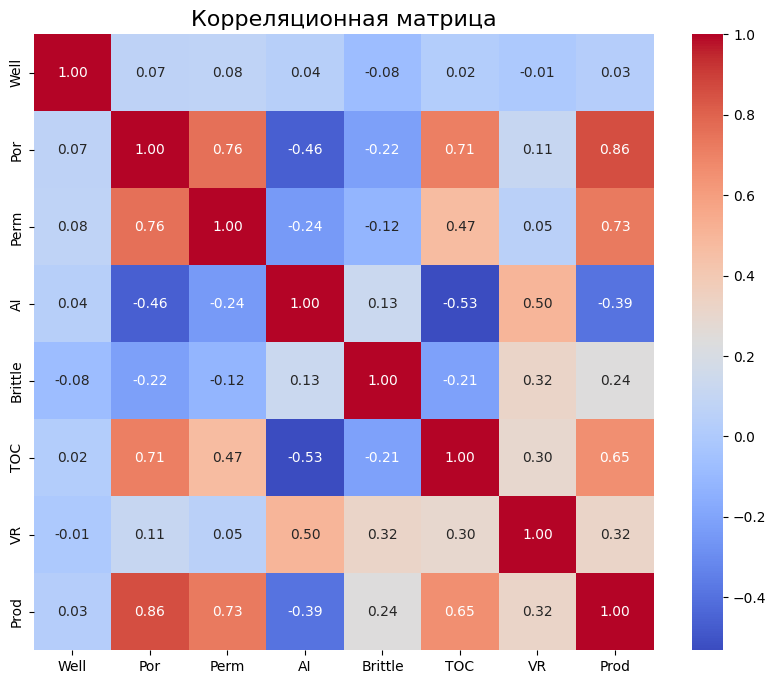

Коэффициенты модели: 
     Признак  Коэффициент модели
0  Intercept             -1835.0
1        Por               293.0
2         AI              -200.0
3    Brittle                28.0
4         VR               517.0
Средняя абсолютная ошибка (MAE): 171.43
Средняя абсолютная процентная ошибка (MAPE): 4.04%


In [20]:
# Исключаем из выборке сильно коррелированные признаки

# Для начала сохраняем копию датафрейм
data_copy = data.copy()

# Рассчёт корреляционной матрицы
plt.figure(figsize=(10, 8))
corr_matrix = data.corr()  # Вычисляем корреляционную матрицу
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Корреляционная матрица', fontsize=16)
plt.show()

# удаляем сильно коррелированные признаки оставляя более коррелированные с Prod
# сделал вручную, т.к. признаков немного (маштабировать при таком подходе неввозможно, 
# но для задания должно подойти)
exc = ['Well', 'Perm', 'TOC']
data_filtered= data_copy.drop(exc, axis=1)

# Матрица наблюдений и вектор правильных ответов
X = np.column_stack((np.ones(data_copy.shape[0]), data_filtered.drop(['Prod'], axis=1)))
y = data_filtered['Prod'].values

# вычисляем OLS-оценку для коэффициентов
w_hat = np.linalg.inv(X.T @ X) @ X.T @ y
w_hat_rounded = w_hat.round()

# Предсказываем переменную
y_pred = X @ w_hat

# Для оценки качества модели линейной регрессии использовал две метрики MAE и MAPE.
mae = mean_absolute_error(y, y_pred) # Рассчитываем насколько в среднем модель ошибается в милл. кубических футов
mape = mean_absolute_percentage_error(y, y_pred) * 100 # Насколько модель ошибается в проц. относительно факт значения

# Коэффициенты модели
coeff = pd.DataFrame({
    'Признак': ['Intercept'] + list(data_filtered.drop(['Prod'], axis=1).columns),
    'Коэффициент модели': w_hat.flatten().round()
})

# Результаты
print(f"Коэффициенты модели: \n{coeff}")
print(f"Средняя абсолютная ошибка (MAE): {mae:.2f}")
print(f"Средняя абсолютная процентная ошибка (MAPE): {mape:.2f}%")

# Вывод:
На основе данных можно сделать следующие выводы:
- При увеличении Por (пористости) на 1 ед. в среднем выработка газа увеличится в 293 милл. кубических футов. 

В сравнении с предыдущей моделью, где коэффициент был 230, влияние Por стало сильнее и более значимым, что связано с устранением мультиколлинеарности с Perm.
- Отрицательное значение Ai (импенданс) с увеличением этого показателя на 1 ед. выработка уменьшится на 200 милл. куб. футов.

В сравнении с предыдущей моделью, где коэффициент был −365, влияние Ai стало менее выраженным, что может быть связано с перераспределением влияния из-за удаления сильно коррелированных факторов.

- Увеличение VR на 1 единицу приводит к увеличению выработки газа в среднем на 517 милл. куб. футов в день.

Этот фактор остаётся значимым для модели, хотя его влияние уменьшилось (ранее 785) из-за устранения мультиколлинеарности с другими факторами.

- Если сравнить с предыдущими значениями, то при удалении сильно коррелируемых признаков результаты этой модели стали более интерпретируемыми и ближе к реальности.
- Согласно метрики MAE эта модель в среднем ошибается на 171 милл. куб. футов в день.
- Из метрики MAPE можно сделать вывод, что модель в среднем ошибается на 4.05 процента относительно реальной выработки газа (процент достаточно низкий, хотя и чуть выше предыдущего - 3.63 %).
- Противоречия между коэффициентами модели и корреляцией устранены.

В итоге модель чуть потеряла в точности, однако стала более устойчивой с более интерпретируемыми результатами.

### Задание 5.6. (1 балл)

Наконец, давайте построим модель линейной регрессии из библиотеки `scikit-learn (sklearn)` и сравним результаты её работы с теми, что нам удалось получить вручную. 

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого воспользуйтесь классом `LinearRegression` из библиотеки `sklearn`. Выведите значения полученных коэффициентов, округлённые до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте значение выбранной вами метрики (или метрик).

Сравните результаты библиотечной реализации с тем, что вы получили ранее. 

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов построена модель линейной регрессии из библиотеки sklearn и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * приведён вывод о соответствии результатов, полученных вручную и с помощью библиотеки.
- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [25]:
from sklearn.linear_model import LinearRegression

exc = ['Well', 'Perm', 'TOC']
data_filtered= data_copy.drop(exc, axis=1)

# Матрица наблюдений и вектор правильных ответов после удаления ненужных признаков
X = data_filtered.drop('Prod', axis=1)
y = data_filtered[['Prod']]

# Модель линейной регрессии
lr = LinearRegression()
lr.fit(X, y)

# предсказание модели
y_pred = lr.predict(X)

# Метрики качества модели
mae = mean_absolute_error(y, y_pred)  # Средняя абсолютная ошибка
mape = mean_absolute_percentage_error(y, y_pred) * 100  # Средняя абсолютная процентная ошибка

# Коэффициенты модели
coeff = pd.DataFrame({
    'Признак': list(data_filtered.drop(['Prod'], axis=1).columns),
    'Коэффициент модели': lr.coef_[0].round()
})

# Результаты
print(f"Коэффициенты модели: \n{coeff}")
print(f"Средняя абсолютная ошибка (MAE): {mae:.2f}")
print(f"Средняя абсолютная процентная ошибка (MAPE): {mape:.2f}%")

Коэффициенты модели: 
   Признак  Коэффициент модели
0      Por               293.0
1       AI              -200.0
2  Brittle                28.0
3       VR               517.0
Средняя абсолютная ошибка (MAE): 171.43
Средняя абсолютная процентная ошибка (MAPE): 4.04%


# Вывод:
Результаты, полученные с использованием библиотеки sklearn, идентичны результатам ручного расчёта с использованием матричной формулы. Это подтверждает, что обе реализации корректны и дают одинаковые итоги для текущего набора данных.

## Практика: полиномиальная регрессия и регуляризация

Мы продолжаем работать над задачей от владельца компании «Газ-Таз-Ваз-Нефть» Василия.

Ранее мы построили модель линейной регрессии, которая прогнозирует выработку газа на скважине. Для этого мы с помощью матрицы корреляций и рассуждений отобрали некоррелированные, значимые для предсказания признаки. **Далее мы будем использовать именно их (см. задание 5.5).**

Мы хотим улучшить результат — уменьшить ошибку прогноза. Для этого мы воспользуемся моделью полиномиальной регрессии третьей степени. Однако теперь мы знаем, что полиномиальным моделям очень легко переобучиться под исходную выборку. Так как данных у нас не так много (всего 200 скважин), то для контроля качества модели мы будем использовать кросс-валидацию. 

Приступим! Выполните задания 8.1–8.5:


In [26]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

### Задание 8.1. (1 балл)

Стандаризируйте признаки с помощью `StandartScaler` из библиотеки `sklearn`. 

Затем сгенерируйте полиномиальные признаки третьего порядка на факторах, которые вы выбрали для обучения моделей. Для этого воспользуйтесь генератором полиномов `PolynomialFeatures` из библиотеки `sklearn`. Параметр `include_bias` установите в значение `False`.

Выведите на экран, сколько факторов у вас получилось после генерации полиномиальных признаков.

**Важно:** стандартизацию необходимо произвести до генерации полиномиальных факторов!

Обучите модель линейной регрессии из библиотеки `sklearn` (`LinearRegression`) на полученных полиномиальных факторах.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов сгенерированы полиномиальные признаки третьего порядка;
    * построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).
- Задание выполнено неверно, не учтено одно или несколько из условий (**0 баллов**).

In [70]:
# Матрица наблюдений и вектор правильных ответов после удаления ненужных признаков
X = data_filtered.drop('Prod', axis=1)
y = data_filtered[['Prod']]

# Стандартизируем признаки
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f'Количество факторов до генерации: {X.shape[1]}')
# Генерируем полиноминальные признаки с полиномом 3 степени
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

print(f'Количество факторов ПОСЛЕ генерации: {X_poly.shape[1]}')
print('--'*20)

# Линейная регрессия
lr = LinearRegression()
lr.fit(X_scaled, y)

# Оцениваем модель на кросс-валидации, метрика - МАРЕ
cv_results = cross_validate(
    lr, # Модель линейной регрессии lasso
    X_scaled, # Факторы
    y, # Целевая переменная
    scoring='neg_mean_absolute_error', # метрика
    cv=5, # 5 фолдов
    return_train_score=True # Возвращаем результаты валидации
    )

print()
print('MAE на тренировочных фолдах: {:.2f}'.format(-cv_results['train_score'].mean()))
print('MAE на валидационных фолдах: {:.2f}'.format(-cv_results['test_score'].mean()))

Количество факторов до генерации: 4
Количество факторов ПОСЛЕ генерации: 34
----------------------------------------

MAE на тренировочных фолдах: 170.50
MAE на валидационных фолдах: 179.02


# Вывод:
Модель линейной регресси с использованием: 
- стандартизации. Это устраняет масштабные различия между факторами, делая модель менее чувствительной к их абсолютным значениям.
- полиноминальных признаков 3 степени. Это позволило модели учитывать нелинейные зависимости между признаками и целевой переменной. 

Разница между тренировочной и валидационных фолдах незначительная, что может быть следствием хорошей обобщающей способности модели. Однако этот модель можно улучшить с помощью регуляризации т.к. из-за большого количества новых созданных полиноминальных признаков - 34 ее обобщающая способность может упасть на других новых данных.

### Задание 8.2. (2 балла)

Теперь попробуем воспользоваться линейной регрессией с регуляризацией. Для начала возьмём $L_1$-регуляризацию.

Обучите модель `Lasso` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Lasso), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [83]:
from sklearn.metrics import make_scorer, mean_absolute_error

# Диапазон значений альфа
alpha = {'alpha': np.arange(0.01, 15.1, 0.1)}

# Линейная регрессия с регуляризацией L-1-Lasso
lasso = Lasso()

# Для поиска гиперпараметров использую GridSearchCV
grid_search = GridSearchCV(
    estimator=lasso,
    param_grid=alpha,
    scoring=make_scorer(mean_absolute_error, greater_is_better=False),
    cv=5
)

grid_search.fit(X_scaled, y)

# Лучшее значение alpha и соответствующая ошибка
best_alpha = grid_search.best_params_['alpha']
best_score = -grid_search.best_score_

print(f"Лучшее значение alpha: {best_alpha}")
print(f"Лучшая ошибка (MAE): {best_score:.2f}")

# Линейная регрессия c регуляризацией L1-Lasso
lasso = Lasso(alpha=best_alpha, max_iter=10_000)
lasso.fit(X_scaled, y)

# Оцениваем модель на кросс-валидации, метрика - MAE
cv_results = cross_validate(
    lasso, # Модель линейной регрессии lasso
    X_scaled, # Факторы
    y, # Целевая переменная
    scoring='neg_mean_absolute_error', # метрика
    cv=5, # 5 фолдов
    return_train_score=True # Возвращаем результаты валидации
    )

print()
print('MAE на тренировочных фолдах: {:.2f}'.format(-cv_results['train_score'].mean()))
print('MAE на валидационных фолдах: {:.2f}'.format(-cv_results['test_score'].mean()))

# Вывод коэффициентов модели
print("\nКоэффициенты модели ElasticNet:")
for name, coef in zip(poly.get_feature_names_out(), lasso.coef_):
    print(f"{name}: {coef:.4f}")

Лучшее значение alpha: 4.01
Лучшая ошибка (MAE): 178.70

MAE на тренировочных фолдах: 169.99
MAE на валидационных фолдах: 178.70

Коэффициенты модели ElasticNet:
x0: 868.2801
x1: -105.3286
x2: 386.7640
x3: 148.2810


# Вывод:
Интересно то, что значения с использованием alpha и Lasso ухудшились. Хотя должны были быть лучше. Видимо это может быть связано с тем, что алгоритм L1 регуляризации склонен обулять признаки, из-за этого некоторая важная для модели информация обнулилась. Даже при уменьшении диапазона alpha результаты не сильно улучшаются.

### Задание 8.3. (2 балла)

Проделаем то же самое с $L_2$-регуляризацией.

Обучите модель `Ridge` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

In [82]:
# Диапазон значений альфа
alpha = {'alpha': np.arange(0.01, 15.1, 0.1)}

# Линейная регрессия с регуляризацией L-2-Ridge
ridge = Ridge()

# Для поиска гиперпараметров использую GridSearchCV
grid_search = GridSearchCV(
    estimator=ridge,
    param_grid=alpha,
    scoring=make_scorer(mean_absolute_error, greater_is_better=False),
    cv=5
)

grid_search.fit(X_scaled, y)

# Лучшее значение alpha и соответствующая ошибка
best_alpha = grid_search.best_params_['alpha']
best_score = -grid_search.best_score_

print(f"Лучшее значение alpha: {best_alpha}")
print(f"Лучшая ошибка (MAE): {best_score:.2f}")

# Линейная регрессия c регуляризацией L2-Ridge
ridge = Ridge(alpha=best_alpha, max_iter=10_000)
ridge.fit(X_scaled, y)

# Оцениваем модель на кросс-валидации, метрика - MAE
cv_results = cross_validate(
    ridge, # Модель линейной регрессии ridge
    X_scaled, # Факторы
    y, # Целевая переменная
    scoring='neg_mean_absolute_error', # метрика
    cv=5, # 5 фолдов
    return_train_score=True # Возвращаем результаты валидации
    )

print()
print('MAE на тренировочных фолдах: {:.2f}'.format(-cv_results['train_score'].mean()))
print('MAE на валидационных фолдах: {:.2f}'.format(-cv_results['test_score'].mean()))

# Вывод коэффициентов модели
print("\nКоэффициенты модели ElasticNet:")
for name, coef in zip(poly.get_feature_names_out(), ridge.coef_):
    print(f"{name}: {coef:.4f}")

Лучшее значение alpha: 0.01
Лучшая ошибка (MAE): 179.02

MAE на тренировочных фолдах: 170.50
MAE на валидационных фолдах: 179.02

Коэффициенты модели ElasticNet:
x0: 868.4078
x1: -113.1516
x2: 389.5328
x3: 155.2934


**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Ridge), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

# Выводы:
Разница между валидационным и тренировочными фолдами у модели Ridge чуть ниже, однако же эта разница не существенная, но в тоже время это говорит о такой же хорошей обобщающей способности модели с использованием Ridge. Ошибка в модели Lasso чуть ниже Ridge, но также эта разница не существенная, что может свидетельствовать о схожести моделей и подобранных оптимальных для обеих моделей коэффициентов alpha. Обнуленные коэффициенты в Lasso не были значимыми, что минимально повлияло на метрику MAE.

Как итог обе модели имеют схожую точность, с небольшим преимуществом у Lasso.

### Задание 8.4. (2 балла)

Наконец, настало время комбинировать $L_1$ и $L_2$ -регуляризации.

Обучите модель `ElasticNet` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициенты регуляризации (`alpha` и `l1-ratio`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение метрики MAPE на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (ElasticNet), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [81]:
# Диапазоны гиперпараметров
params = {
    'alpha': np.arange(0.01, 15.1, 0.1),
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
}

# Модель ElasticNet
elastic_net = ElasticNet(max_iter=10_000)

# GridSearchCV с метрикой MAPE
grid_search = GridSearchCV(
    estimator=elastic_net,
    param_grid=params,
    scoring=make_scorer(mean_absolute_percentage_error, greater_is_better=False),  # MAPE
    cv=5
)

# Подбор гиперпараметров
grid_search.fit(X_scaled, y)

# Лучшие параметры и метрика
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

print(f"Лучшие параметры: \nalpha = {best_params['alpha']}; \nl1_ratio = {best_params['l1_ratio']}")
print(f"Лучшая ошибка (MAPE): {best_score:.2f} %")

# Лучшая модель ElasticNet
elastic_net = ElasticNet(alpha=best_params['alpha'], l1_ratio=best_params['l1_ratio'], max_iter=10_000)
elastic_net.fit(X_scaled, y)

# Кросс-валидация с метрикой MAPE
cv_results = cross_validate(
    elastic_net,
    X_scaled,
    y,
    scoring='neg_mean_absolute_percentage_error',
    cv=5,
    return_train_score=True
)

# Вывод метрик MAPE
print('\nMAPE на тренировочных фолдах: {:.2f} %'.format(-cv_results['train_score'].mean() * 100))
print('MAPE на валидационных фолдах: {:.2f} %'.format(-cv_results['test_score'].mean() * 100))

# Вывод коэффициентов модели
print("\nКоэффициенты модели ElasticNet:")
for name, coef in zip(poly.get_feature_names_out(), elastic_net.coef_):
    print(f"{name}: {coef:.4f}")

Лучшие параметры: 
alpha = 12.41; 
l1_ratio = 1.0
Лучшая ошибка (MAPE): 0.04 %

MAPE на тренировочных фолдах: 3.98 %
MAPE на валидационных фолдах: 4.21 %

Коэффициенты модели ElasticNet:
x0: 867.5588
x1: -89.3094
x2: 380.7370
x3: 133.8819


# Вывод:
В данном случае ElasticNet сочетает преимущества обоих методов, но с подобранными параметрами (l1_ratio=1.0) она ведет себя как Lasso. Разница между тренировочной и валидационной метриками составляет всего 0.23%, что говорит о хорошей обобщающей способности модели. Она не переобучается и справляется с задачей на новых данных. Она не переобучается и справляется с задачей на новых данных. Коэффициенты модели указывают на значимость факторов: 
- x2 оказывает наибольшее влияние на предсказания (коэффициент 380.74).
- x1 вносит отрицательный вклад, но его влияние меньше, чем у x2. Поскольку модель использует l1_ratio=1.0 (ведет себя как Lasso), она склонна занулять незначимые коэффициенты. В данном случае значимые факторы сохранены.

### Задание 8.5. (1 балл)

Завершением вашей работы будет сводная таблица результатов, которую вы представите на презентации заказчику Василию.

Составьте таблицу (DataFrame) со следующими столбцами (имена столбцов выберите самостоятельно):
* Наименование модели.
* Гиперпараметры (коэффициенты регуляризации, если таковые имеются), если нет — оставьте ячейку пустой.
* Использовались ли полиномиальные признаки при построении модели (Да/Нет или True/False).
* Значение выбранной метрики на тренировочных фолдах при кросс-валидации модели.
* Значение выбранной метрики на валидационных фолдах при кросс-валидации модели.

Сделайте финальный вывод по проделанной работе. Какая линейная модель из тех, что мы рассмотрели, показала наилучший результат с точки зрения качества на валидационных фолдах, а также с точки зрения переобученности?

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * верно составлена сводная таблица итоговых результатов построенных ранее моделей с указанными в задании столбцами;
    * приведены итоговые выводы по проделанной работе, указано, какая из рассмотренных моделей показала наилучший результат.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [85]:
# Сводная таблица результатов
summary_table = pd.DataFrame({
    'Наименование модели': ['Lasso', 'Ridge', 'ElasticNet'],
    'Гиперпараметры': [
        'alpha=4.01',
        'alpha=0.01',
        'alpha=12.41, l1_ratio=1.0'
    ],
    'Полиномиальные признаки': [True, True, True],
    'Метрика на тренировочных фолдах': ['169.99 (MAE)', '170.50 (MAE)', '3.98% (MAPE)'],
    'Метрика на валидационных фолдах': ['178.70 (MAE)', '179.02 (MAE)', '4.21% (MAPE)']
})

display(summary_table)

,Наименование модели,Гиперпараметры,Полиномиальные признаки,Метрика на тренировочных фолдах,Метрика на валидационных фолдах
0,Lasso,alpha=4.01,True,169.99 (MAE),178.70 (MAE)
1,Ridge,alpha=0.01,True,170.50 (MAE),179.02 (MAE)
2,ElasticNet,"alpha=12.41, l1_ratio=1.0",True,3.98% (MAPE),4.21% (MAPE)


# Вывод:
В данном случае результаты всех моделей оказались близкими и незначительно отличаются друг от друга. Однако стоит учитывать, что модель создается для будущих новых данных (маштабируется). Учитывая, что модель Lasso получила хорошие результаты, но она может и обнулять признаки (и в теории они могут быть важными), то стоит воздержаться от использования данной модели. Ridge сохраняет все признаки, но чуть хуже справляется с полученными данными и в целом стабильна.

Золотой серединой между двумя моделями будет имеено ElasticNet, с возможностью более тонкой настройки двух других способов регуляризации.